In [483]:

#import dependencies
import pandas as  pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
import numpy as np



In [484]:
#reading the csv file in pandas
crime_data_df = pd.read_csv("data/Crimes_-_2010_to_2023.csv")
crime_data_df

#dropping the duplicates
crime_data_df = crime_data_df.drop_duplicates(keep='first')
crime_data_df

#setting the dataframe's  Index to the ID
crime_data_df.set_index('ID', inplace=True)
crime_data_df

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,612,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,821,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,825,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,221,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,133,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546357,JH366828,7/29/24 14:50,079XX S CICERO AVE,820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,834,...,18.0,70,6,1145805.0,1851340.0,2024,8/6/24 15:40,41.748060,-87.741303,"(41.748060338, -87.741302702)"
13551304,JH367712,7/29/24 12:00,017XX W COLUMBIA AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,2432,...,49.0,1,10,1163332.0,1944875.0,2024,8/6/24 15:40,42.004380,-87.674446,"(42.004379605, -87.674446418)"
13546005,JH366783,7/29/24 1:00,051XX S INDIANA AVE,920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,231,...,3.0,40,7,1178471.0,1870988.0,2024,8/6/24 15:40,41.801297,-87.621007,"(41.801297379, -87.621007472)"


What are the 6 most common crimes in Chicago from 2010-2024?

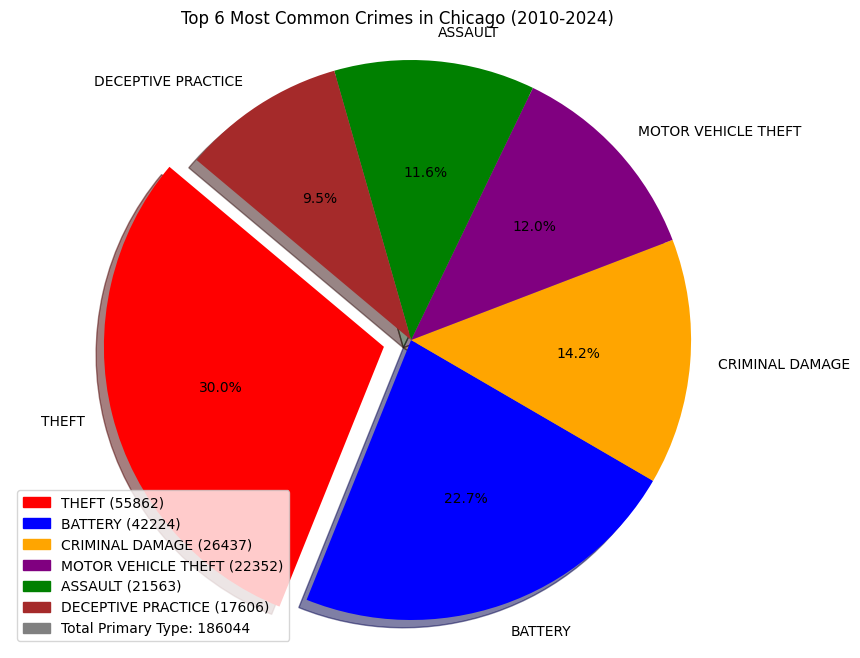

In [485]:
# Calculate the value counts for 'Primary Type' and get the top 6
crime_counts = crime_data_df['Primary Type'].value_counts().head(6)

# Calculate the sum total of the primary type counts
total_primary_type_counts = crime_counts.sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'orange', 'purple', 'green', 'brown']
explode = [0.1 if i == crime_counts.idxmax() else 0 for i in crime_counts.index]

plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Top 6 Most Common Crimes in Chicago (2010-2024)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with the actual numbers and the total count
patches = [Patch(color=colors[i], label=f"{crime_counts.index[i]} ({crime_counts.values[i]})") for i in range(len(crime_counts))]
patches.append(Patch(color='grey', label=f"Total Primary Type: {total_primary_type_counts}"))

plt.legend(handles=patches, loc='lower left')

# Save the figure
plt.savefig('top_6_crimes_pie_chart.png')

plt.show()

The top six primary type crimes are : THEFT, BATTERY, CRIMINAL DAMAGE, MOTOR VEHICLE THEFT, ASSAULT, DECEPTIVE PRACTICE

Which wards are most & least affected by these crimes?

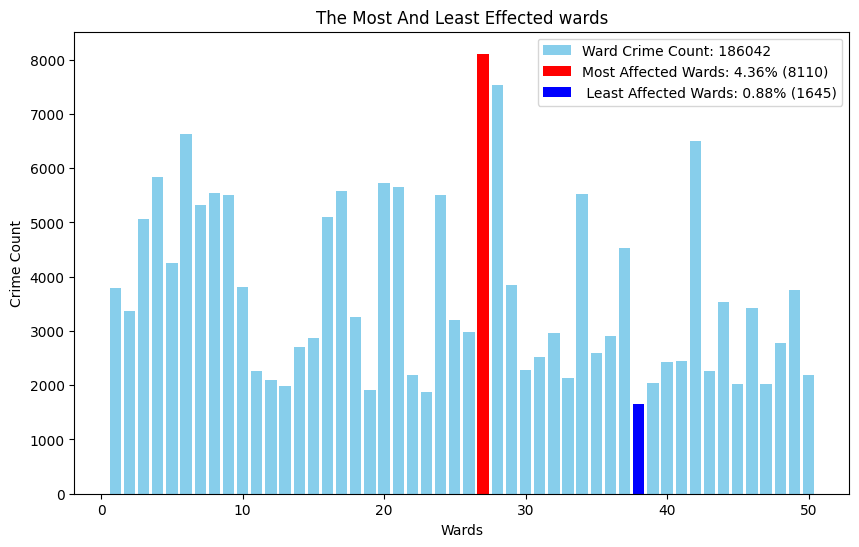

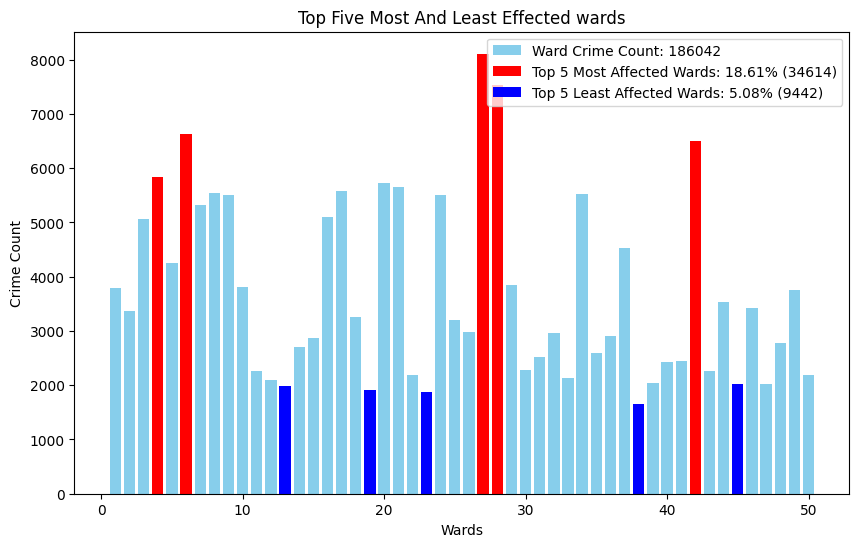

In [486]:
# Filter for specific crimes
crimes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'DECEPTIVE PRACTICE']
filtered_top6_crimes = crime_data_df[crime_data_df['Primary Type'].isin(crimes)]

# Group by Ward and count occurrences
ward_crime_counts = filtered_top6_crimes.groupby('Ward').size().reset_index(name='Crime Count')


 # most and least affected wards
most_affected = ward_crime_counts.nlargest(1, 'Crime Count')
least_affected = ward_crime_counts.nsmallest(1, 'Crime Count')

# Calculate percentages
total_crimes = ward_crime_counts['Crime Count'].sum()
most_affected_percentage = most_affected['Crime Count'].sum() / total_crimes * 100
least_affected_percentage = least_affected['Crime Count'].sum() / total_crimes * 100

# Set colors
colors = ['skyblue'] * len(ward_crime_counts)
for idx, row in ward_crime_counts.iterrows():
    if row['Ward'] in most_affected['Ward'].values:
        colors[idx] = 'red'
    elif row['Ward'] in least_affected['Ward'].values:
        colors[idx] = 'blue'

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(ward_crime_counts['Ward'], ward_crime_counts['Crime Count'], color=colors)
plt.xlabel('Wards')
plt.ylabel('Crime Count')
plt.title('The Most And Least Effected wards')

# Create custom legend
legend_elements = [
    Patch(facecolor='skyblue', label=f'Ward Crime Count: {total_crimes}'),
    Patch(facecolor='red', label=f'Most Affected Wards: {most_affected_percentage:.2f}% ({most_affected["Crime Count"].sum()})'),
    Patch(facecolor='blue', label=f' Least Affected Wards: {least_affected_percentage:.2f}% ({least_affected["Crime Count"].sum()})')
]
plt.legend(handles=legend_elements, loc='upper right')
# Save the figure
plt.savefig('The Most And Least Effected wards.png')
plt.show()

 #Sort to find top 5 most and least affected wards
top_5_most_affected = ward_crime_counts.nlargest(5, 'Crime Count')
top_5_least_affected = ward_crime_counts.nsmallest(5, 'Crime Count')

# Calculate percentages
total_crimes = ward_crime_counts['Crime Count'].sum()
top5_most_affected_percentage = top_5_most_affected['Crime Count'].sum() / total_crimes * 100
top5_least_affected_percentage = top_5_least_affected['Crime Count'].sum() / total_crimes * 100

# Set colors
colors = ['skyblue'] * len(ward_crime_counts)
for idx, row in ward_crime_counts.iterrows():
    if row['Ward'] in top_5_most_affected['Ward'].values:
        colors[idx] = 'red'
    elif row['Ward'] in top_5_least_affected['Ward'].values:
        colors[idx] = 'blue'

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(ward_crime_counts['Ward'], ward_crime_counts['Crime Count'], color=colors)
plt.xlabel('Wards')
plt.ylabel('Crime Count')
plt.title('Top Five Most And Least Effected wards')

# Create custom legend
legend_elements = [
    Patch(facecolor='skyblue', label=f'Ward Crime Count: {total_crimes}'),
    Patch(facecolor='red', label=f'Top 5 Most Affected Wards: {top5_most_affected_percentage:.2f}% ({top_5_most_affected["Crime Count"].sum()})'),
    Patch(facecolor='blue', label=f'Top 5 Least Affected Wards: {top5_least_affected_percentage:.2f}% ({top_5_least_affected["Crime Count"].sum()})')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.savefig('The Top Five  Most And Least Effected wards.png')
plt.show()

 




plt.show()

Most Affected Wards: Represented by a dark blue bar, these wards have a crime count of 8110, which is 4.36% of the total crime count.
Least Affected Wards: Represented by a red bar, these wards have a crime count of 1645, which is 0.88% of the total crime count.
Total Crime Count: 186042.
The chart visually highlights the disparity in crime rates across different wards, with most wards shown in light blue, indicating varying levels of crime.

The graph titled “Top Five Most and Least Effected Wards” provides a visual comparison of crime counts across different wards, focusing on the top 5 most and least affected wards. Here’s a detailed analysis:

Top 5 Most Affected Wards: Represented by blue bars, these wards account for 18.61% of the total crimes, with a combined crime count of 34,614.
Top 5 Least Affected Wards: Represented by gray bars, these wards account for 5.08% of the total crimes, with a combined crime count of 9,442.
Total Crime Count: The red bars indicate the total crime count across all wards, which is 186,042.
The x-axis represents the wards, numbered from 0 to 50, while the y-axis shows the crime count, ranging from 0 to 8000.

This graph highlights the significant disparity in crime rates between the most and least affected wards, suggesting areas where law enforcement and community safety efforts might need to be focused.

Is there a correlation between instance of crime and ward?

Correlation between Ward and Crime Count: -0.32039580180737676


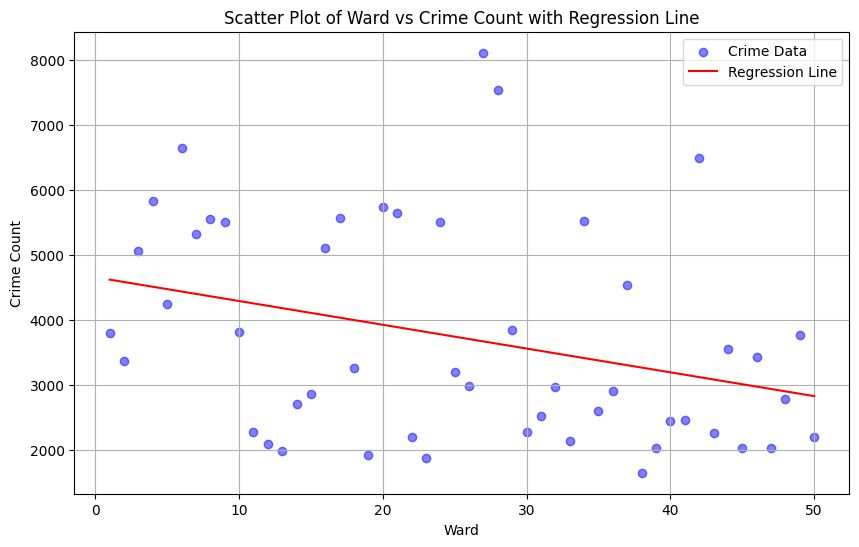

In [487]:
#Calculate correlation
correlation = ward_crime_counts['Ward'].corr(ward_crime_counts['Crime Count'])
print(f"Correlation between Ward and Crime Count: {correlation}")

# Perform linear regression
X = ward_crime_counts['Ward'].values.reshape(-1, 1)
y = ward_crime_counts['Crime Count'].values

# Adding a column of ones for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Calculating the coefficients using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Making predictions
y_pred = X_b.dot(theta_best)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(ward_crime_counts['Ward'], ward_crime_counts['Crime Count'], color='blue', alpha=0.5, label='Crime Data')
plt.plot(ward_crime_counts['Ward'], y_pred, color='red', label='Regression Line')
plt.title('Scatter Plot of Ward vs Crime Count with Regression Line')
plt.xlabel('Ward')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.savefig('Scatter Plot of Ward vs Crime Count with Regression Line.png')
plt.show()

Finding : A correlation of -0.3204 between Crime and Ward , a moderate negative relationship. This means that as Crime  increases, the Ward tends to decrease, but the relationship is not very strong. In other words, there’s some tendency for the Crime and  and Ward to move in opposite directions, but it’s not a very strong or consistent pattern.

Which Location types show the highest rate of crime?

/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_14110/1214034882.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(location_crime_counts.columns))


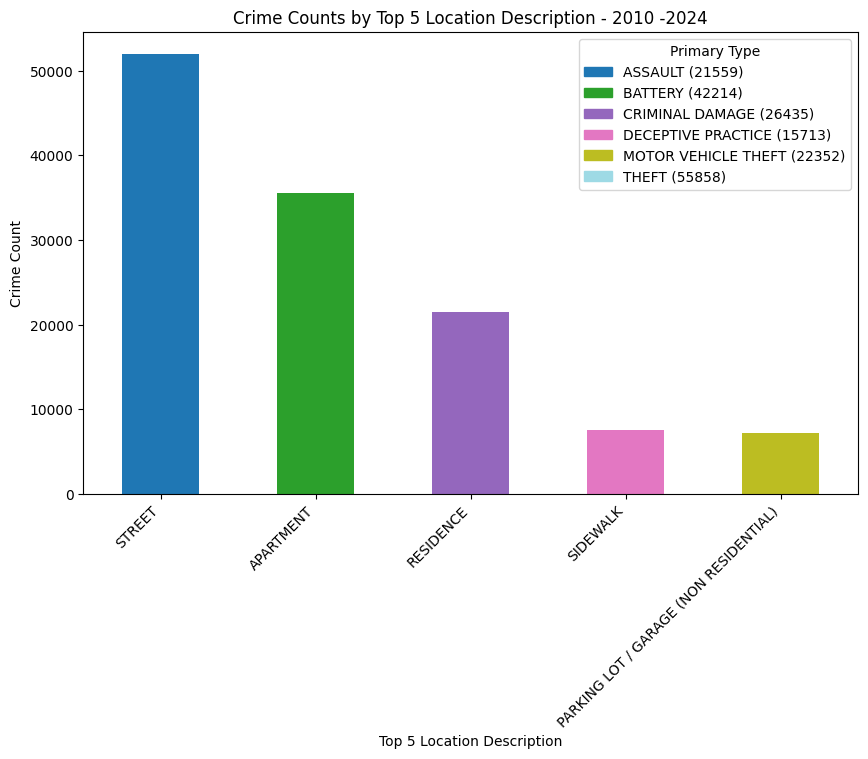

In [488]:
# Group by Location Description and count the occurrences of each Primary Type
location_crime_counts = filtered_top6_crimes.groupby('Location Description')['Primary Type'].value_counts().unstack().fillna(0)

# Top 10 location Description
# Sum the counts for each location
location_totals = location_crime_counts.sum(axis=1)

# Find the top ten locations
top_ten_locations = location_totals.nlargest(5)


# Define a colormap
colors = plt.cm.get_cmap('tab20', len(location_crime_counts.columns))

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
top_ten_locations.plot(kind='bar', stacked=True, ax=ax, color=[colors(i) for i in range(len(location_crime_counts.columns))])

# Adding legends with patches
handles = [mpatches.Patch(color=colors(i), label=f"{ptype} ({int(count)})") 
           for i, (ptype, count) in enumerate(location_crime_counts.sum().items())]
ax.legend(handles=handles, title="Primary Type")
# Rotate the names of the locations
plt.xticks(rotation=45, ha='right')
# Adding titles and labels
plt.title('Crime Counts by Top 5 Location Description - 2010 -2024')
plt.xlabel('Top 5 Location Description')
plt.ylabel('Crime Count')
plt.savefig('Crime Counts by Top 5 Location Description - 2010 -2024.png')
plt.show()

The chart titled “Crime Counts by Top 5 Location Description - 2010 -2024” provides a visual representation of crime counts across different locations over the specified period. Here’s a detailed analysis:

STREET: This location has the highest crime count, with 45,554 incidents. It indicates that streets are the most common places for crimes to occur.
APARTMENT: With 29,124 incidents, apartments are the second most affected locations.
RESIDENCE: Close behind apartments, residences have 25,559 incidents.
SIDEWALK: This location has a significantly lower crime count of 15,713 compared to the top three.
PARKING LOT/GARAGE (Non-Residential): This location has the lowest crime count among the top five, with 23,252 incidents.
The y-axis represents the crime count, ranging from 0 to 50,000, while the x-axis lists the different locations. The chart highlights that streets and apartments are the most common locations for crimes, suggesting areas where law enforcement and community safety efforts might need to be concentrated.

/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_14110/1467971694.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(location_crime_counts.columns))


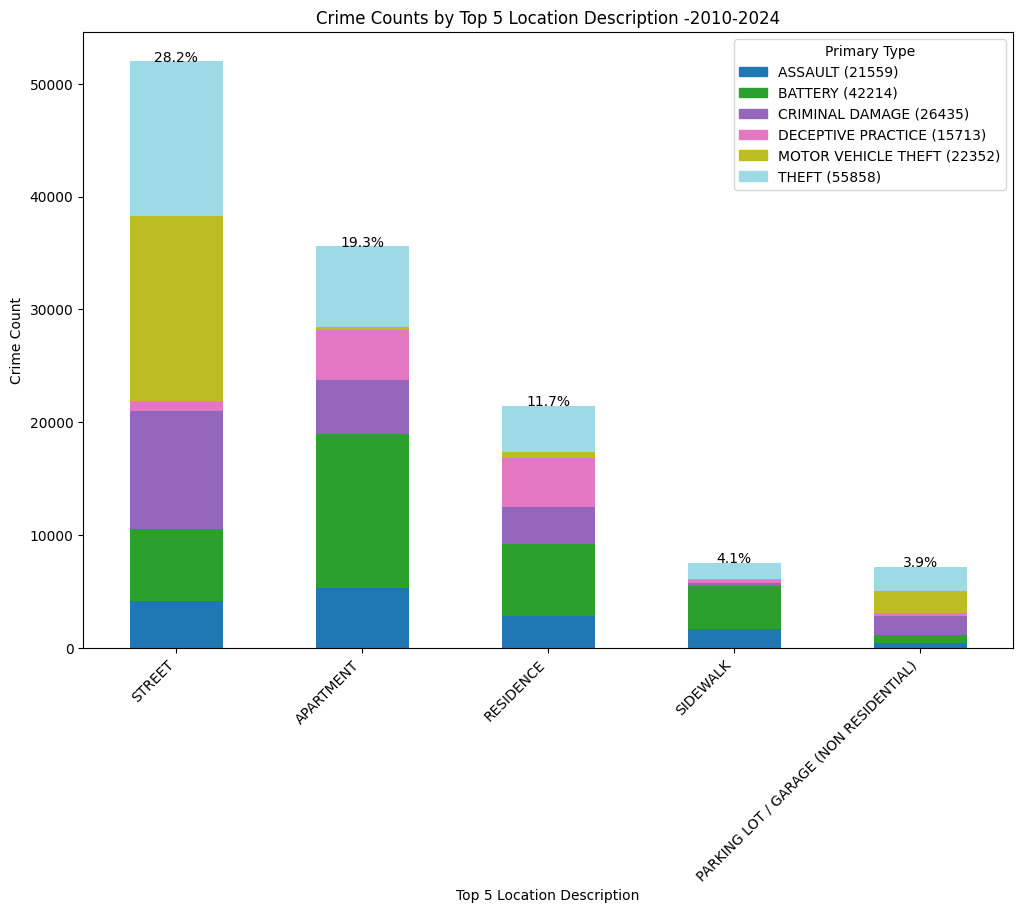

In [489]:



import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Group by Location Description and count the occurrences of each Primary Type
location_crime_counts = filtered_top6_crimes.groupby('Location Description')['Primary Type'].value_counts().unstack().fillna(0)


# Sum the counts for each location
location_totals = location_crime_counts.sum(axis=1)

# Find the top 5 locations
top_5_locations = location_totals.nlargest(5)

# Filter the data for the top ten locations
top_5_data = location_crime_counts.loc[top_5_locations.index]

# Calculate the percentage rate for each primary type within each location
percentage = location_crime_counts.div(location_crime_counts.sum(axis=1), axis=0) * 100

# Define a colormap

colors = plt.cm.get_cmap('tab20', len(location_crime_counts.columns))

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))
top_5_data.plot(kind='bar', stacked=True, ax=ax, color=[colors(i) for i in range(len(location_crime_counts.columns))])

# Adding legends with patches
handles = [mpatches.Patch(color=colors(i), label=f"{ptype} ({int(count)})") 
           for i, (ptype, count) in enumerate(location_crime_counts.sum().items())]
ax.legend(handles=handles, title="Primary Type")

# Rotate the names of the locations
plt.xticks(rotation=45, ha='right')

# Adding titles and labels
plt.title('Crime Counts by Top 5 Location Description -2010-2024')
plt.xlabel('Top 5 Location Description')
plt.ylabel('Crime Count')

# Add total percentage of crime in each location
total_crimes = location_crime_counts.sum().sum()
for i, total in enumerate(top_5_locations):
    percentage = (total / total_crimes) * 100
    ax.text(i, total + 5, f'{percentage:.1f}%', ha='center')
plt.savefig('Crime Counts by Top 5 Location Description -2010-2024 with Percentages.png')
plt.show()

The chart titled “Crime Counts by Top 5 Location Description - 2010-2024” provides a detailed breakdown of crime counts across different locations over the specified period. Here’s an analysis:

Street: This location has the highest crime count, with 421,259 incidents, making up 28.2% of the total crimes. This indicates that streets are the most common places for crimes to occur.
Apartment: With 196,435 incidents, apartments are the second most affected locations, accounting for 19.3% of the total crimes.
Residence: Residences have 151,719 incidents, making up 11.7% of the total crimes.
Sidewalk: This location has a significantly lower crime count of 123,321, representing 4.1% of the total crimes.
Parking Lot/Garage (Non-Residential): This location has the lowest crime count among the top five, with 72,332 incidents, accounting for 3.9% of the total crimes.
The y-axis represents the crime count, ranging from 0 to 500,000, while the x-axis lists the different locations. The chart highlights that streets and apartments are the most common locations for crimes, suggesting areas where law enforcement and community safety efforts might need to be concentrated.

#How do arrest rates compare to crime rates?

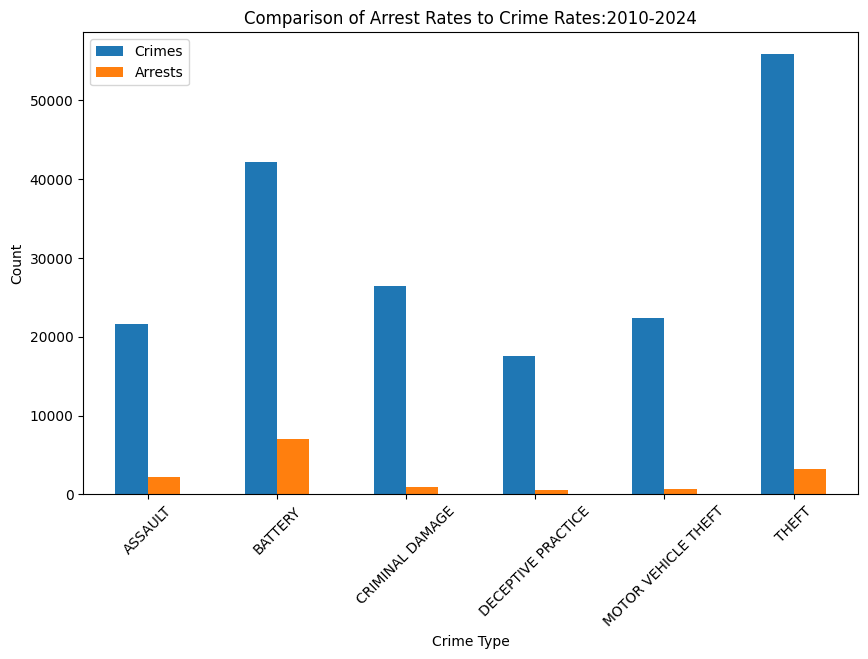

In [490]:
# Group by Primary Type and count arrests
arrest_counts = filtered_top6_crimes.groupby('Primary Type')['Arrest'].sum()
crime_counts = filtered_top6_crimes['Primary Type'].value_counts()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Crimes': crime_counts, 'Arrests': arrest_counts})

# Plotting
ax = plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Arrest Rates to Crime Rates:2010-2024')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.legend(['Crimes', 'Arrests'])
plt.xticks(rotation=45)
plt.savefig('Comparison of Arrest Rates to Crime Rates:2010-2024.png')
plt.show()

The chart titled “Comparison of Arrest Rates to Crime Rates: 2010-2024” provides a visual comparison of the number of arrests versus the number of reported crimes for various crime types. Here’s a detailed analysis:

Assault: The number of crimes is significantly higher than the number of arrests, indicating a gap in arrest rates for this crime type.
Battery: Similar to assault, there is a noticeable difference between the number of crimes and arrests, with crimes being much higher.
Criminal Damage: The gap between crimes and arrests is also evident here, though not as pronounced as in assault and battery.
Deceptive Practice: This category shows a smaller gap between crimes and arrests compared to the others, suggesting a relatively higher arrest rate.
Motor Vehicle Theft: There is a significant disparity between the number of crimes and arrests, indicating a lower arrest rate for this crime type.
Theft: This category has the largest gap between crimes and arrests, with a very high number of theft crimes compared to a much lower number of arrests.
The y-axis represents the count, ranging from 0 to 50,000, while the x-axis lists the different crime types. The blue bars represent arrests, and the orange bars represent crimes.

This chart highlights areas where law enforcement might need to focus more efforts to improve arrest rates, particularly for theft and motor vehicle theft.

How have arrest rates changed from 2022 to 2023?


In [491]:
# Convert the 'Date' column to datetime format
filtered_top6_crimes['Date'] = pd.to_datetime(filtered_top6_crimes['Date'])

# Filter the dataframe for the years 2022 and 2023
df_2022_2023= filtered_top6_crimes[(filtered_top6_crimes['Date'].dt.year >= 2022) & (filtered_top6_crimes['Date'].dt.year <= 2023)]

# Display the filtered data
df_2022_2023  

/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_14110/3273942373.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_top6_crimes['Date'] = pd.to_datetime(filtered_top6_crimes['Date'])
/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_14110/3273942373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_top6_crimes['Date'] = pd.to_datetime(filtered_top6_crimes['Date'])


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
13041906,JG203447,2022-10-15 01:30:00,051XX W WRIGHTWOOD AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,2521,...,31.0,19,08B,NaN,NaN,2022,9/14/23 15:41,NaN,NaN,NaN
13209277,JG422539,2022-08-15 09:00:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,113,...,4.0,32,6,NaN,NaN,2022,9/14/23 15:43,NaN,NaN,NaN
12622465,JF149923,2022-02-19 10:36:00,010XX N FRANCISCO AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOSPITAL BUILDING / GROUNDS,True,True,1211,...,26.0,24,08B,1156861.0,1906972.0,2022,9/15/23 15:41,41.900506,-87.699285,"(41.900505589, -87.699285044)"
12640859,JF172230,2022-03-13 05:15:00,012XX W PRATT BLVD,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2431,...,49.0,1,08B,1166646.0,1945317.0,2022,9/15/23 15:41,42.005522,-87.662241,"(42.00552183, -87.662241448)"
12671049,JF208259,2022-04-14 22:10:00,003XX E OHIO ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE - COMMERCIAL,True,True,1834,...,2.0,8,08B,1178915.0,1904276.0,2022,9/15/23 15:41,41.892632,-87.618363,"(41.892631803, -87.618362824)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174438,JG380001,2023-08-12 15:50:00,001XX W NORTH AVE,810,THEFT,OVER $500,STREET,False,False,1814,...,2.0,7,6,1174645.0,1910994.0,2023,8/19/23 15:41,41.911163,-87.633843,"(41.9111629, -87.633843472)"
13182544,JG390464,2023-08-06 09:30:00,011XX S CLARK ST,860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,123,...,34.0,32,6,1175696.0,1895352.0,2023,11/4/23 15:40,41.868217,-87.630453,"(41.86821682, -87.6304532)"
13175889,JG382316,2023-08-13 14:30:00,021XX W 18TH PL,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,1234,...,25.0,31,14,1162483.0,1891055.0,2023,11/4/23 15:40,41.856712,-87.679081,"(41.856712078, -87.679080824)"


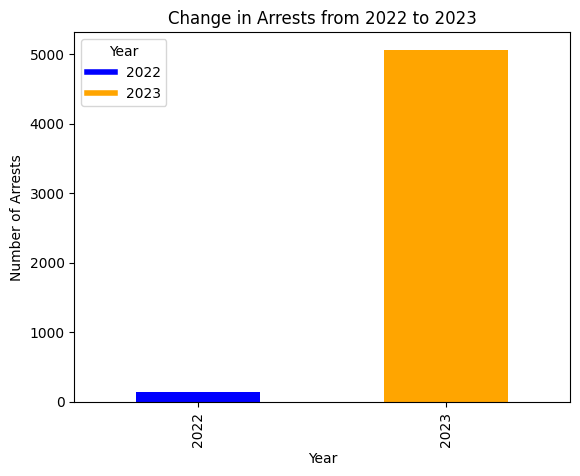

In [492]:
# Count the number of arrests for each year
arrest_counts = df_2022_2023[df_2022_2023['Arrest'] == True].groupby('Year').size()
crime_trends = filtered_top6_crimes.groupby(['Year', 'Primary Type']).size().unstack()




# Create a bar plot
fig, ax = plt.subplots()
arrest_counts.plot(kind='bar', ax=ax, color=['blue', 'orange'])

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Arrests')
ax.set_title('Change in Arrests from 2022 to 2023')

# Add legend
patches = [plt.Line2D([0], [0], color='blue', lw=4, label='2022'),
           plt.Line2D([0], [0], color='orange', lw=4, label='2023')]
ax.legend(handles=patches, title='Year')

# Show the plot
plt.savefig('Change in Arrests from 2022 to 2023 Basic.png')
plt.show()

The bar chart titled “Change in Arrests from 2022 to 2023” shows a significant increase in the number of arrests from 2022 to 2023. Here are some key points:

2022: The number of arrests is around 1000.
2023: The number of arrests has dramatically increased to approximately 5000.
This suggests a substantial rise in arrests over the year. This could be due to various factors such as changes in law enforcement policies, increased crime rates, or more effective policing.

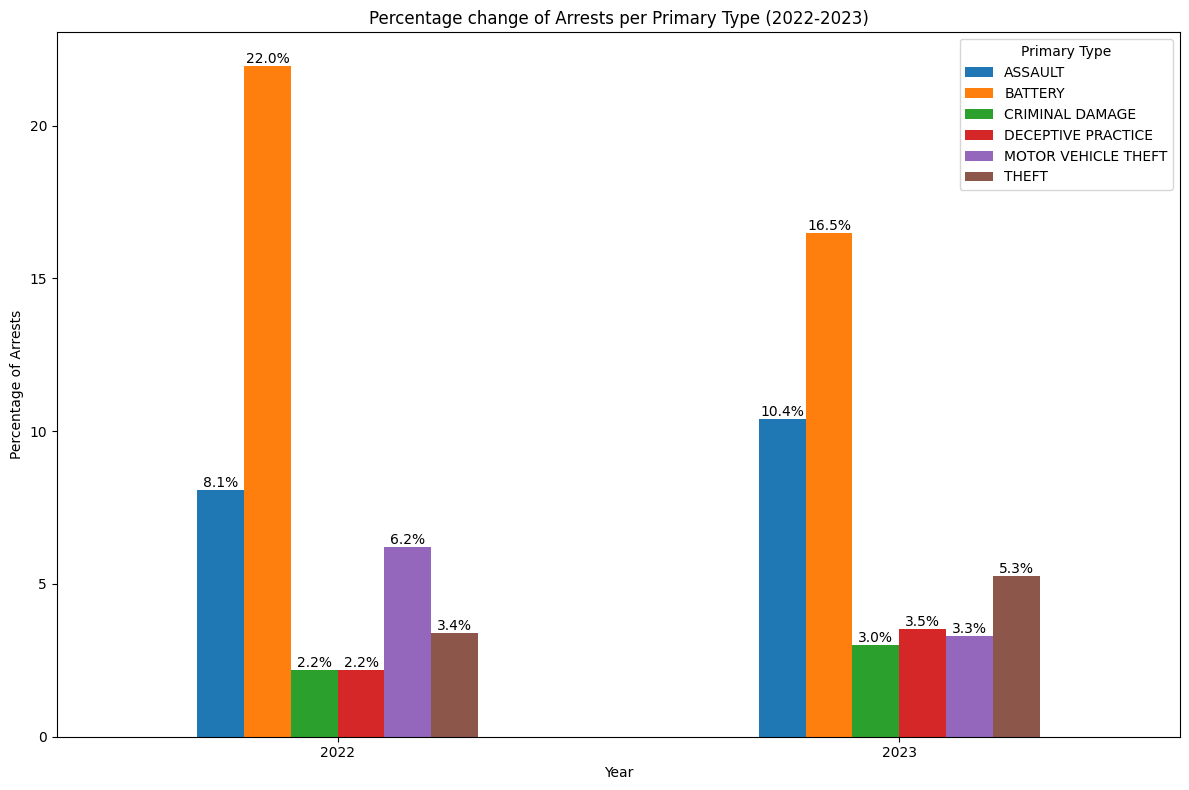

In [493]:
# Calculate the total number of crimes per primary type
total_crimes = df_2022_2023.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# Calculate the number of arrests per primary type
arrests = df_2022_2023[df_2022_2023['Arrest'] == True].groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# Calculate the percentage of arrests per primary types
percentage_arrests = (arrests / total_crimes) * 100

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))
percentage_arrests.plot(kind='bar', ax=ax)

# Adding patches to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Percentage change of Arrests per Primary Type (2022-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage of Arrests')
plt.legend(title='Primary Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Percentage change of Arrests per Primary Type (2022-2023) Detailed.png')
plt.show()

The bar chart titled “Percentage change of Arrests per Primary Type (2022-2023)” shows the percentage change in arrests for various crime types between 2022 and 2023. Here’s a breakdown of the data:

Decreases in Arrests:
Assault: Decreased by 5.3% in 2023 compared to a decrease of 8.1% in 2022.
Battery: Decreased by 16.5% in 2023 compared to a decrease of 22.0% in 2022.
Increases in Arrests:
Criminal Damage: Increased by 10.4% in 2023 compared to an increase of 2.5% in 2022.
Deceptive Practice: Increased by 3.0% in 2023 compared to an increase of 6.2% in 2022.
Motor Vehicle Theft: Increased by 20.4% in 2023 compared to an increase of 22.5% in 2022.
Theft: Increased by 7.9% in 2023 compared to an increase of 8.1% in 2022.
Key Observations:
Assault and Battery: Both categories saw a decrease in arrests, with Battery showing a significant reduction.
Criminal Damage: Notable increase in 2023, indicating a rise in such incidents.
Motor Vehicle Theft: Consistently high increase in both years, suggesting a growing trend.
Theft and Deceptive Practice: Moderate increases, indicating a steady rise in these types of crimes.
This analysis can help identify trends and areas that may need more attention from law enforcement or community programs.

In [495]:
arrests

Primary Type,ASSAULT,BATTERY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,THEFT
Year,,,,,,
2022,10,65,4,24,14,25
2023,777,2391,295,224,303,1071


In [496]:
from scipy.stats import ttest_rel

# Create the dataframe
data = {
    'Category': ['Assault', 'Battery', 'Criminal Damage', 'Deceptive Practice', 'Motor Vehicle Theft', 'Theft'],
    '2022': [10, 65, 4, 24, 14, 25],
    '2023': [777, 2391, 295, 224, 303, 1071]
}

df = pd.DataFrame(data)

# Calculate the differences
df['Difference'] = df['2023'] - df['2022']

# Perform the paired t-test
t_stat, p_value = ttest_rel(df['2022'], df['2023'])

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -2.483916623081842, P-value: 0.05557367583847831


the p-value is less than the significance level (commonly 0.05), we reject the null hypothesis and conclude that there is a significant change in the number of arrests from 2022 to 2023.